In [1]:
import obspy
import matplotlib.pyplot as plt 
import numpy as np

from math import pow
from obspy.io.segy.core import _read_segy

In [2]:
path = "/home/andbro/Documents/MJR/scripts/sections_overview/data/raw-offset_mod_flp/"
path = "/home/andbro/Documents/MJR/scripts/sections_overview/data/processed/"

station = "s105ch1"

stations = [
            "s101ch1",
#             "s102ch1",
#             "s103ch1",
           ]



In [3]:
# s101ch2
scale, rwght, tpow, fac, rmin = 1e-1, 0.8, 0.5, 4, 1

In [4]:
# st[0].stats.segy.trace_header

In [5]:
st = _read_segy(path+station+".sgy", unpack_trace_headers=True)    

f_lower = 4.5
f_upper = 35

In [6]:
def __process(st):

    for j, tr in enumerate(st):

#         tr.detrend('linear')

#         tr.filter("bandpass", freqmin=f_lower, freqmax=f_upper, corners=8, zerophase=True)

        tr.stats['distance'] = tr.stats.segy.trace_header.distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group
#         tr.stats.starttime = 0

    return st

In [7]:
# st.plot(type="section", scale=0.2);

In [8]:
scale = 1e-2

rwght = 0.8

tpow = 0.1

fac = 4

rmin = 1

v_reduced = 7.0

normalize=True

# stations = [
#             "s105ch1",
#             "s105ch2",
#            ]

(-53.469, 48.284)

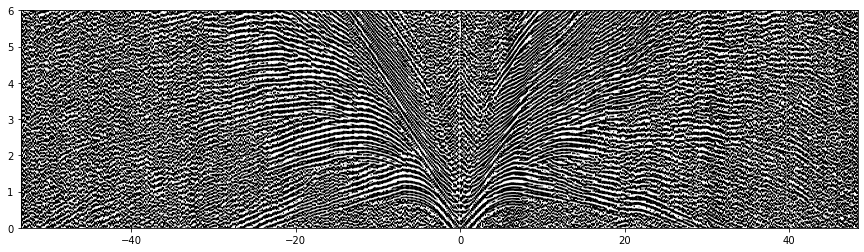

In [9]:
st = __process(st)

## __________________________________________

fig, ax = plt.subplots(1, 1, figsize=(15,4))


for n in range(0,len(st),1):

    dist = st[n].stats.distance/1000

    t = np.arange(st[n].stats.npts)*st[n].stats.delta 

    y = st[n].data
    
    if normalize:
        y = y/max(y)
        
    
    if abs(dist) > rmin:
        y = y * scale * abs(dist)**rwght * t**tpow + dist

    else:
        y = st[n].data/max(st[n].data) * scale *fac *t**tpow  + dist

    t_reduced = t - abs(dist)/v_reduced

#     ax.plot(y, t_reduced, 'k', lw=0.5)

    ax.fill_betweenx(t_reduced, dist, y, where=(y>dist),color='k')


ax.set_ylim(0,6)
ax.set_xlim(st[0].stats.distance/1000, st[-1].stats.distance/1000)



0
1


/home/andbro/anaconda3/envs/obs/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


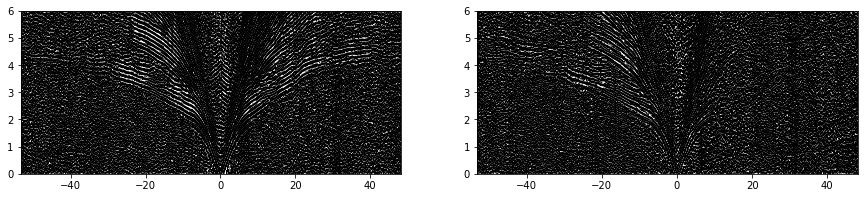

In [10]:

def __makeplot(station):


    ## __________________________________________
    
    N = 2
    fig, ax = plt.subplots(1, N, figsize=(15,3))
    
    
    for nn in range(N):
        print(nn)
        
        if nn == 0:
            st = _read_segy(path+station+"ch1.sgy", unpack_trace_headers=True)    
        if nn == 1:
            st = _read_segy(path+station+"ch2.sgy", unpack_trace_headers=True)    

        st = __process(st)  


        for n in range(0,len(st),1):

            dist = st[n].stats.distance/1000

            t = np.arange(st[n].stats.npts)*st[n].stats.delta 

            y = st[n].data 

            if normalize:
                y = y/max(y)


            if abs(dist) > rmin:
                y = y * scale * abs(dist)**rwght * t**tpow + dist

            else:
                y = st[n].data/max(st[n].data) * scale *fac *t**tpow  + dist

#             t_reduced = t - abs(dist)/v_reduced
            t_reduced = t 
            
            ax[nn].plot(y, t_reduced, 'k', lw=0.0)

            ax[nn].fill_betweenx(t_reduced, dist, y, where=(y>dist),color='k')


        ax[nn].set_ylim(0,6)
        ax[nn].set_xlim(st[0].stats.distance/1000, st[-1].stats.distance/1000)


__makeplot("s105")

In [ ]:

def __makeplot(station):

    st = _read_segy(path+station+"ch1.sgy", unpack_trace_headers=True)    
    
    for tr in st:
        tr.stats['distance'] = tr.stats.segy.trace_header.distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group

    ## __________________________________________
    
    fig, ax = plt.subplots(1, 1, figsize=(15,5))


    for n in range(0,len(st),2):

        dist = st[n].stats.distance/1000

        t = np.arange(st[n].stats.npts)*st[n].stats.delta 

        y = st[n].data * 0.001 + dist

        t_reduced = t 

        ax.plot(y, t_reduced, 'k', lw=0.0)

        ax.fill_betweenx(t_reduced, dist, y, where=(y>dist),color='k')


    ax.set_ylim(0,6)
    ax.set_xlim(st[0].stats.distance/1000, st[-1].stats.distance/1000)



__makeplot("s105")

0
1


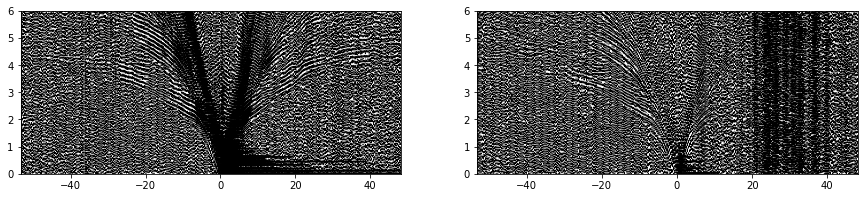

In [11]:

def __makeplot(station):


    ## __________________________________________
    
    N = 2
    fig, ax = plt.subplots(1, N, figsize=(15,3))
    
    
    for nn in range(N):
        print(nn)
        
        if nn == 0:
            st = _read_segy(path+station+"ch1.sgy", unpack_trace_headers=True)    
        if nn == 1:
            st = _read_segy(path+station+"ch2.sgy", unpack_trace_headers=True)    

        for tr in st:
            tr.stats['distance'] = tr.stats.segy.trace_header.distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group


        for n in range(0,len(st),2):

            dist = st[n].stats.distance/1000

            t = np.arange(st[n].stats.npts)*st[n].stats.delta 

            y = st[n].data * 0.001 + dist 

#             t_reduced = t - abs(dist)/v_reduced
            t_reduced = t 
            
            ax[nn].plot(y, t_reduced, 'k', lw=0.0)

            ax[nn].fill_betweenx(t_reduced, dist, y, where=(y>dist),color='k')


        ax[nn].set_ylim(0,6)
        ax[nn].set_xlim(st[0].stats.distance/1000, st[-1].stats.distance/1000)



__makeplot("s105")

In [ ]:
# scale = 1e-7
# rwght = 0.8

# N = len(stations)
# N = 2
# for k, station in enumerate(stations):

#     fig, ax = plt.subplots(N, 2, figsize=(15,20))
        
#     st = _read_segy(path+station+".sgy", unpack_trace_headers=True)    
    
#     for tr in st:

#         tr.detrend('linear')

#         tr.filter("bandpass", freqmin = f_lower, freqmax = f_upper, corners=4, zerophase=True)
        
#         tr.stats['distance'] = tr.stats.segy.trace_header.distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group
#     #     tr.stats.starttime = 0
        

#     for n in range(0,len(st),1):

#         dist = st[n].stats.distance/1000

#         t = np.arange(st[n].stats.npts)*st[n].stats.delta 

#         if abs(dist) > 2:
#             y = st[n].data * scale * abs(dist)**rwght *t**1.5 + dist
#         else:
#             y = st[n].data * scale*4  + dist

#         t_reduced = t - abs(dist)/v_reduced

#         ax[k,0].plot(y, t_reduced, 'k', lw=0.4)

#     ax[k,0].set_ylim(0,6)
#     ax[k,0].set_xlim(st[0].stats.distance/1000, st[-1].stats.distance/1000)